In [2]:
# Importing Libraries
# from adjustText import adjust_text
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.drop(0, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

df['job_skills'] = df['job_skills'].apply(lambda skillset: ast.literal_eval(skillset) if pd.notna(skillset) else skillset)

In [3]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

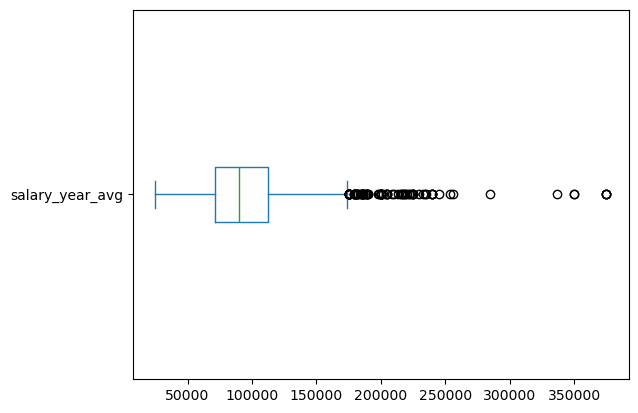

In [8]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c5660c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c56623d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c5660050>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c5663910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c566c3d0>],
 'means': []}

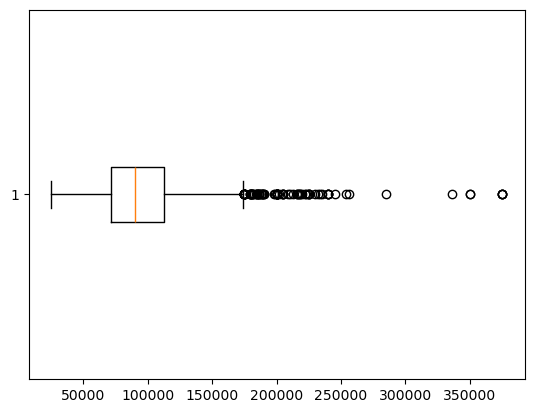

In [26]:
plt.boxplot(df_DA_US['salary_year_avg'], vert = False)

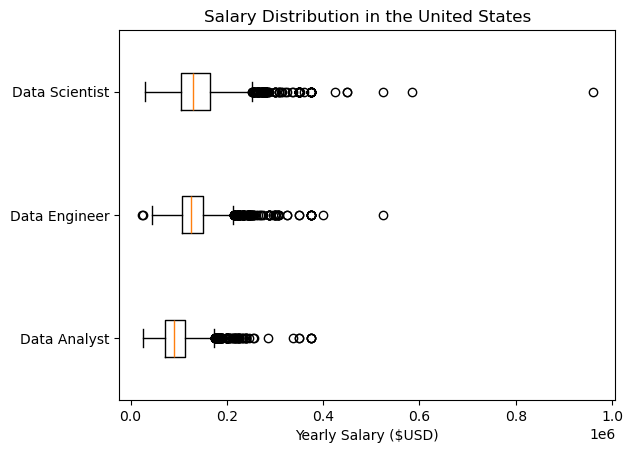

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US.dropna(subset='salary_year_avg', inplace = True)

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

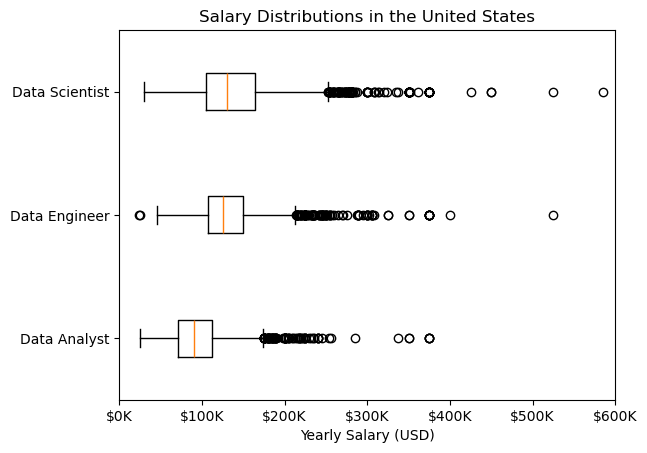

In [25]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
ax =plt.gca()
ax.xaxis.set_major_formatter(ticks_x)
plt.show()